Objective: Create a Wordcloud from the description column. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
# load the cleaned data in to a dataframe
df = pd.read_csv('../data/cleaned_data/us_accidents_cleaned.csv')
df.head()

,severity,start_lat,start_lng,description,city,county,state,temperature(f),humidity(%),visibility(mi),...,precipitation(in),weather_condition,crossing,junction,traffic_signal,sunrise_sunset,year,month,day,time
0,2,37.530804,-122.297714,Accident on 39th Ave at Edison St.,San Mateo,San Mateo,CA,69.8,56.0,9.0,...,0.0,Clear,False,False,False,Day,2016,July,1,13:17:37
1,2,27.960699,-82.705109,Accident on Bayshore Blvd at FL-60 Gulf To Bay...,Clearwater,Pinellas,FL,84.0,82.0,9.0,...,0.0,Fair,True,False,True,Day,2019,June,26,08:17:21
2,2,37.701230,-121.834055,Stationary traffic on I-580 W from Airway Blvd...,Livermore,Alameda,CA,68.0,39.0,10.0,...,0.0,Fair,False,False,False,Day,2022,February,19,13:59:30
3,2,42.385570,-83.261400,At I-96 Local/Outer Dr/Exit 180 - Accident.,Detroit,Wayne,MI,67.5,85.0,10.0,...,0.0,Clear,False,True,False,Day,2018,August,20,07:36:17
4,2,38.347090,-112.659636,At I-15-BL/1400 St/Exit 112 - Accident.,Beaver,Beaver,UT,26.6,80.0,10.0,...,0.0,Mostly Cloudy,False,False,False,Day,2019,February,17,09:48:00


In [ ]:
# get the descriptions from the data
descriptions = df[['description']].astype(str).values
descriptions

array([['Accident on 39th Ave at Edison St.'],
       ['Accident on Bayshore Blvd at FL-60 Gulf To Bay Blvd.'],
       ['Stationary traffic on I-580 W from Airway Blvd (I-580) to I-680 (I-580) due to accident.'],
       ...,
       ['Slow traffic on I-80 W from NE-47/Exit 211 (I-80) to NE-56D/Exit 199 (I-80) due to accident.'],
       ['Left and center lane blocked due to accident on I-495 Eastbound between Borden Ave and I-278 Brooklyn Queens Expy.'],
       ['Lane blocked due to accident on US-231 Memorial Pkwy Northbound at AL-20 Clinton Ave.']],
      dtype=object)

In [15]:
# generate wordcloud
# stopwords helps to filter out common words like 'the', 'and', etc.
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="plasma",
    collocations=False,
    stopwords=STOPWORDS,
).generate(" ".join(descriptions.flatten()))

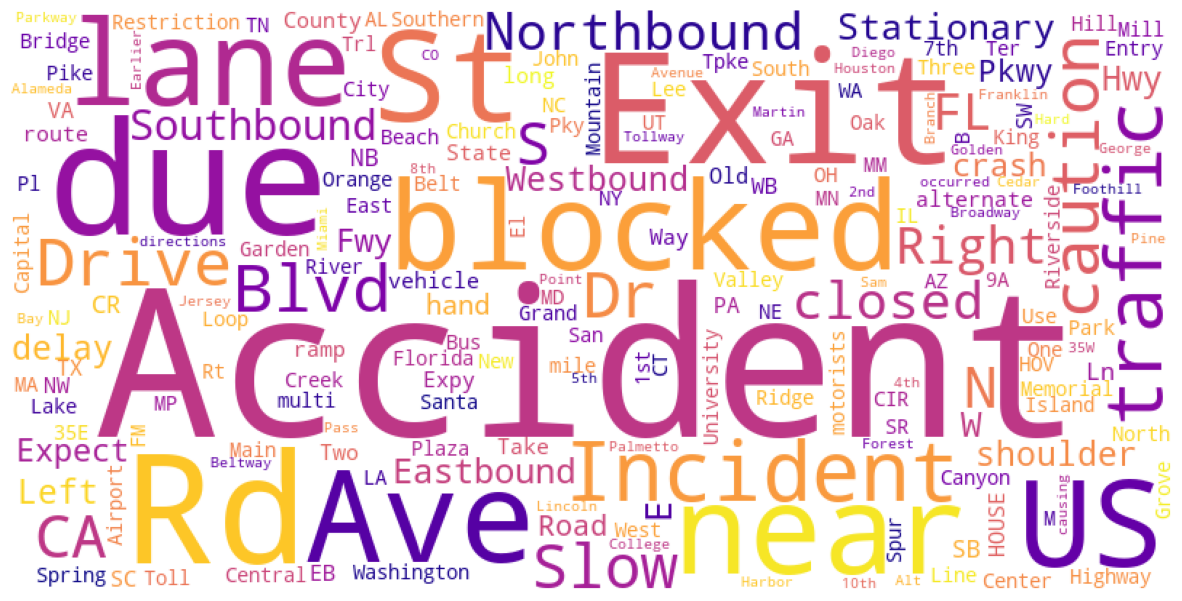

In [16]:
# display wordcloud
plt.figure(figsize=(15, 10))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

In [17]:
# save wordcloud to file
wordcloud.to_file("../images/traffic_wordcloud.png")  